<div align="center">
  <h1 style="color:#8B0000;"><strong>Classification of Personal Loan Approval</strong></h1>
</div>

## **Project Overview**

In this final project, you will be tasked with developing a machine learning model to predict whether a customer will accept a personal loan offer based on their financial and demographic information. This project is designed to assess your understanding of classification algorithms, feature engineering, model evaluation, and the ability to derive actionable insights from data.

## **Dataset**

You will be working with a dataset provided in the notebook `bank_personal_loan.csv`, which contains customer information such as age, income, education, and credit card spending. The target variable is `Personal Loan`, which indicates whether a customer accepted the personal loan offer (1) or not (0).



The file bank_personal_loan.csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

There are no empty or (NaN) values in the dataset. The dataset has a mix of numerical and categorical attributes, but all categorical data are represented with numbers. Moreover, Some of the predictor variables are heavily skewed (long - tailed), making the data pre-processing an interesting yet not too challenging aspect of the data.

The following is the **structure of the data set**:


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:20px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:20px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:20px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>ID</b></td>
<td>Customer ID</td>
<td>1, 2, ...</td>
</tr>
<tr>
<td><b>Age</b></td>
<td>Customer's age in completed years</td>
<td>25, 45, ...</td>
</tr>
<tr>
<td><b>Experience</b></td>
<td><br>Years of professional experience</td>
<td>1, 19, ...</td>
</tr>
<tr>
<td><b>Income</b></td>
<td>Annual income of the customer (1000 Dollar)</td>
<td>49, 34, ...</td>
</tr>
<tr>
<td><b>Zip Code</b></td>
<td>Home Address ZIP code</td>
<td>91107, 90089, ...</td>
</tr>
<tr>
<td><b>Family</b></td>
<td>Family size of the customer<br> (1, 2, 3, 4)</td>
<td>4, 3, ...</td>
</tr>
<tr>
<td><b>CCAvg</b></td>
<td>Avg. spending on credit cards per month (1000 Dollar)</td>
<td>1/60, 1/50, ...</td>
</tr>
<tr>
<td><b>Education</b></td>
<td>Education Level<br>(1: Undergrad; 2: Graduate; 3: Advanced/Professional)</td>
<td>1, 2, ...</td>
</tr>
<tr>
<td><b>Mortgage</b></td>
<td>Value of house mortgage if any. ($1000)</td>
<td>0, 101, ...</td>
</tr>
<tr>
<td><b>**Personal Loan**</b></td>
<td>Did this customer accept the personal loan offered in the last campaign?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
<tr>
<td><b>Securityaccount</b></td>
<td>Does the customer have a securities account with this bank?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
<tr>
<td><b>Cd_account</b></td>
<td>Does the customer have a certificate of deposit (CD) account with this bank?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
<tr>
<td><b>Online</b></td>
<td>Does the customer use internet banking facilities?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
<tr>
<td><b>CreditCard</b></td>
<td>Does the customer use a credit card issued by Universal Bank?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
</tbody>
</table>

## **Project Tasks**

### 1. **Exploratory Data Analysis (EDA)**


### 2. **Feature Engineering**
   

### 3. **Model Development**
  

### 4. **Model Interpretation and Insights**
   


## **Submission Requirements**

- Jupyter Notebook with all code and outputs, clearly commented and organized.



## <font color='#FFB6C1'>**Import the libraries and packages**</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import xgboost as xgb
import catboost as cb
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

## <font color='#FFB6C1'>**Upload Dataset**</font>

In [3]:
# Uploading the dataset
bank_loan = pd.read_csv('bank_loan.csv', index_col='ID')
bank_loan

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0


# 1. **Exploratory Data Analysis (EDA)**

## <font color='#7FFF00'>**Preprocessing and EDA**</font>

In [4]:
# Overview of dataset
bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 5000 non-null   int64 
 1   Experience          5000 non-null   int64 
 2   Income              5000 non-null   int64 
 3   ZIP Code            5000 non-null   int64 
 4   Family              5000 non-null   int64 
 5   CCAvg               5000 non-null   object
 6   Education           5000 non-null   int64 
 7   Mortgage            5000 non-null   int64 
 8   Personal Loan       5000 non-null   int64 
 9   Securities Account  5000 non-null   int64 
 10  CD Account          5000 non-null   int64 
 11  Online              5000 non-null   int64 
 12  CreditCard          5000 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 546.9+ KB


In [5]:
#Check for statistical value
bank_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.5032,2121.852005,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
Education,5000.0,1.8810,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.1044,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.0604,0.238250,0.0,0.0,0.0,0.0,1.0


In [6]:
# Identify all duplicates
any_duplicate = bank_loan.duplicated().any()
any_duplicate

False

In [7]:
#check for miussing values
missing= pd.concat([bank_loan.isnull().sum(), bank_loan.isnull().mean()*100], axis = 1)
missing.columns =['MissingCount', 'MissingPercentage']
missing.sort_values(by='MissingCount', inplace= True) 
missing

,MissingCount,MissingPercentage
Age,0,0.0
Experience,0,0.0
Income,0,0.0
ZIP Code,0,0.0
Family,0,0.0
CCAvg,0,0.0
Education,0,0.0
Mortgage,0,0.0
Personal Loan,0,0.0
Securities Account,0,0.0


In [8]:
# Convert string CCAvg to Float
bank_loan['CCAvg_int'] = bank_loan['CCAvg'].apply(
    lambda x: float(x.replace('/', '.') if '/' in str(x) else x))

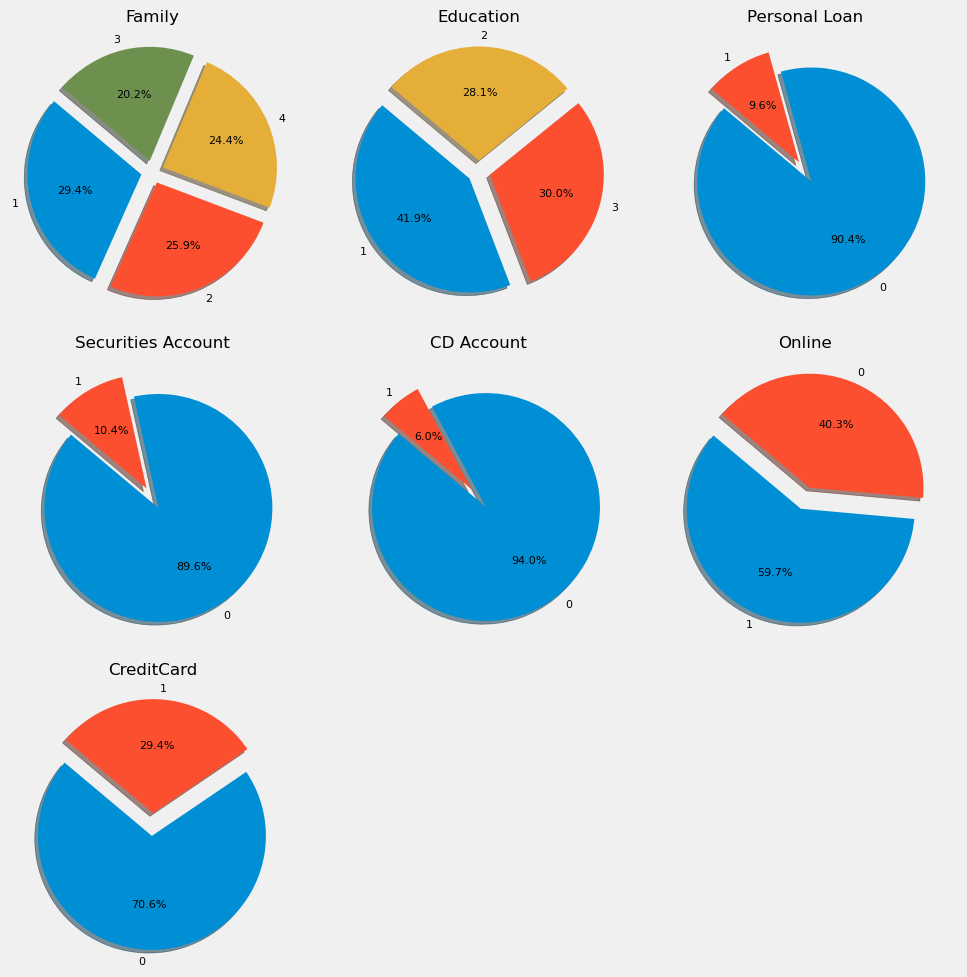

In [9]:
# Visualize features
# Setting up the subplot grid
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Flattening the axis array for easy looping
axs = axs.flatten()

# Columns to plot
columns = ['Family', 'Education', 'Personal Loan', 'Securities Account', 
       'CD Account', 'Online', 'CreditCard']

# Looping through the columns to create pie charts
for i, col in enumerate(columns):
    # Count the frequency of each category
    count = bank_loan[col].value_counts()
    explode=[0.1]*len(count)  # Generate 'explode' dynamically based on the number of slices
                               # Apply a small 'explode' effect to all slices

    # Create the pie chart
    axs[i].pie(count, explode=explode, labels=count.index, autopct='%1.1f%%', startangle=140, shadow= True, textprops={'fontsize': 8})
    axs[i].set_title(col, fontsize=12)

  # Hiding unused subplots
for i in range(len(columns), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

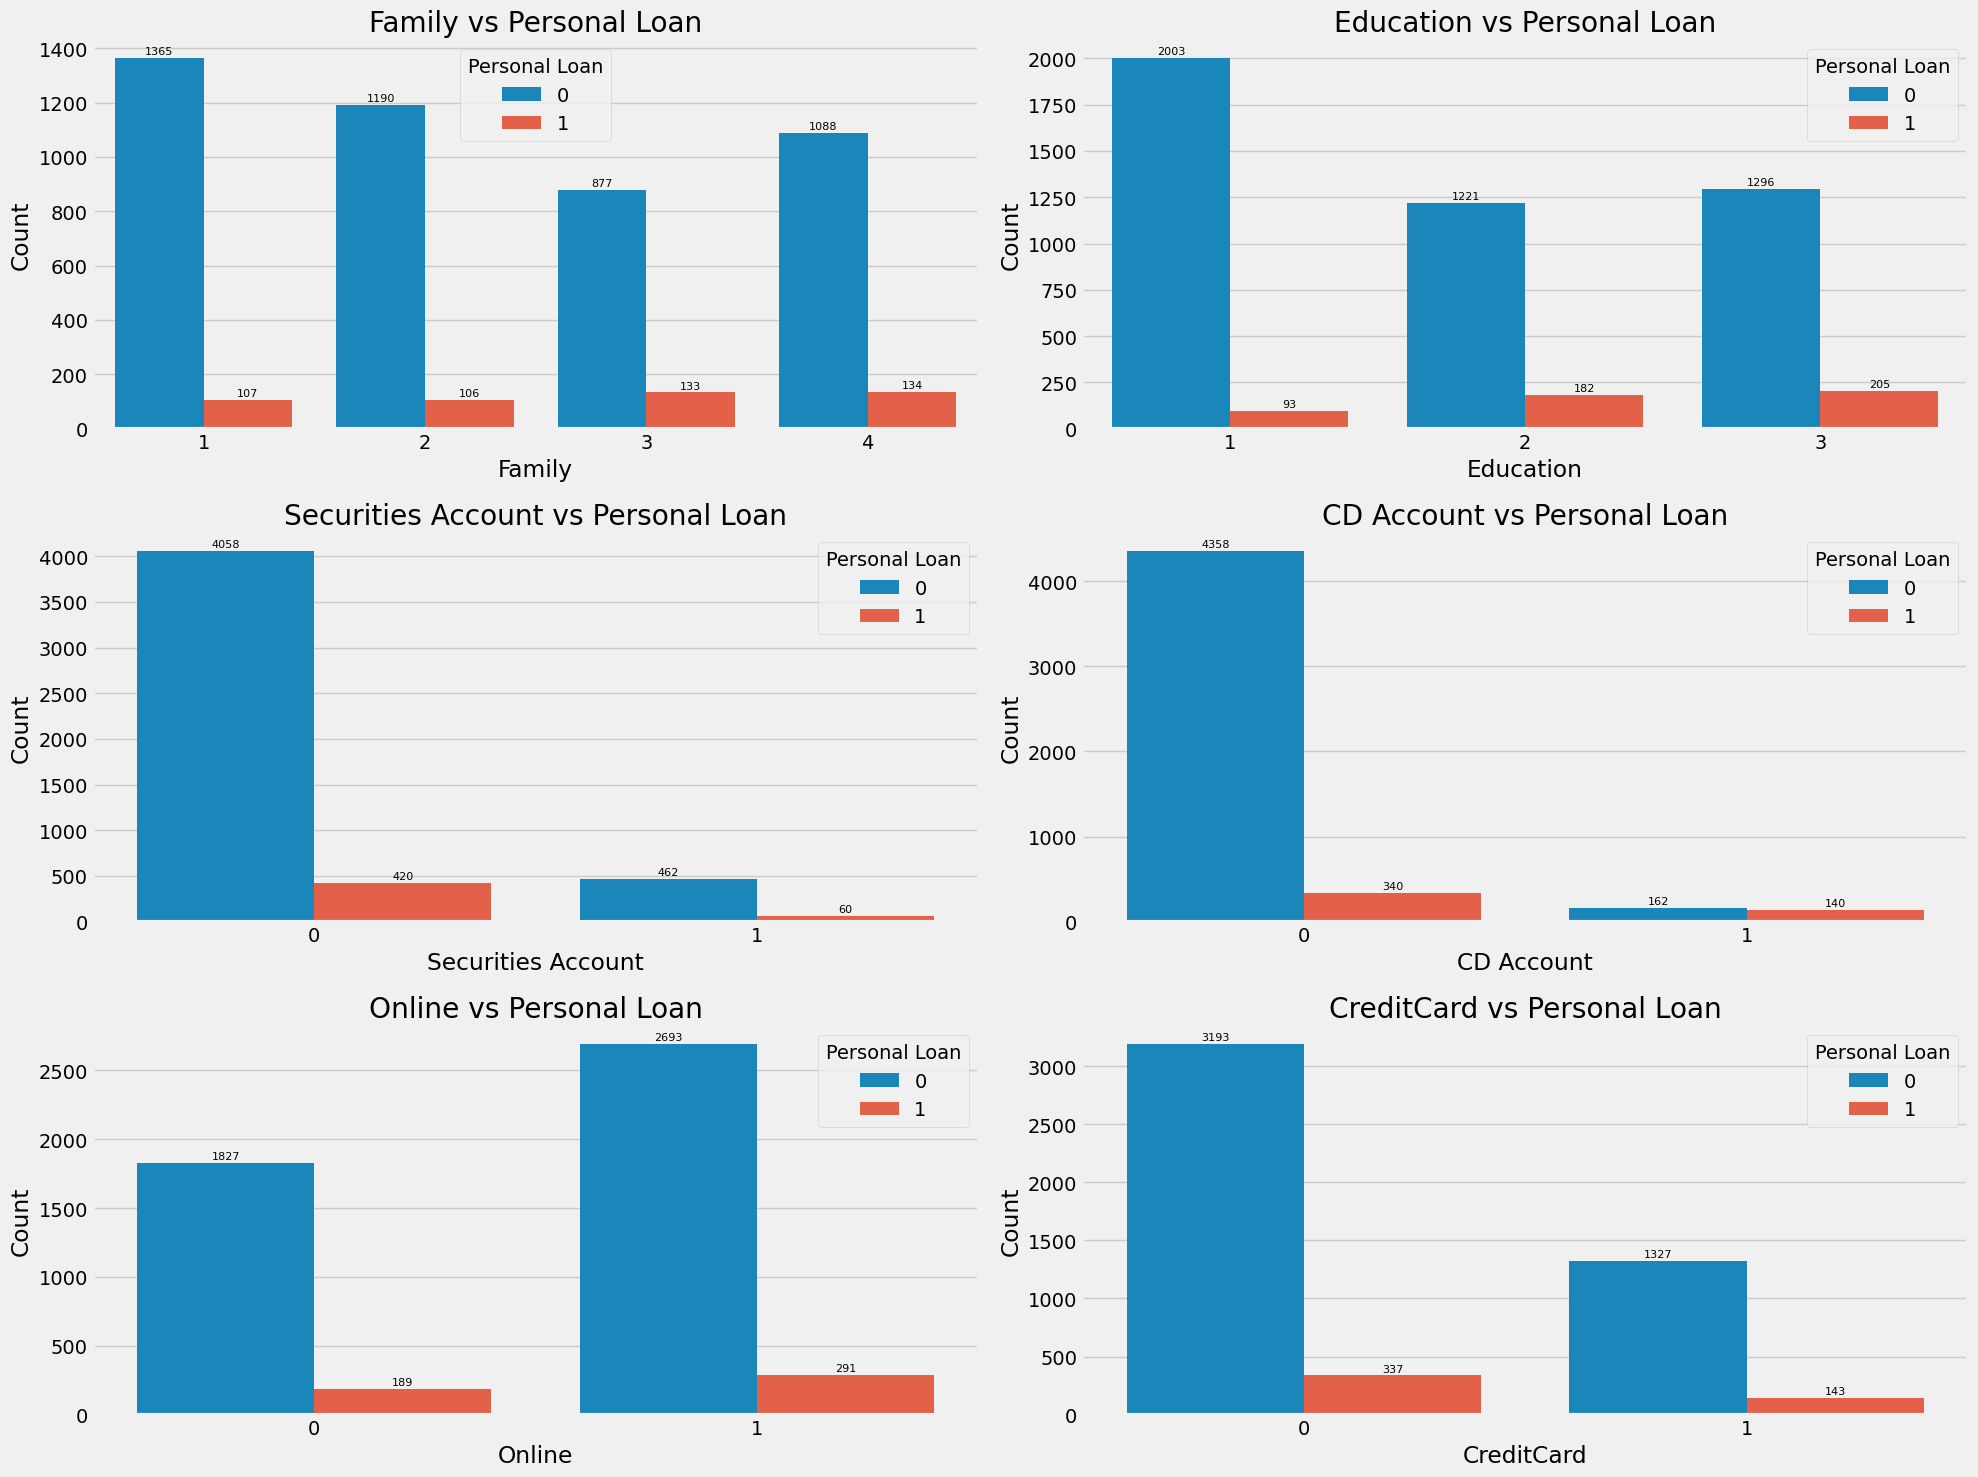

In [10]:
#count plot with 3X2 grid to visualiz features
plt.figure(figsize=(20, 15))

features = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

for i, feature in enumerate(features, 1):
    plt.subplot(3,2, i)  
    ax = sns.countplot(x=feature, data=bank_loan, hue='Personal Loan') 
    plt.title(f'{feature} vs Personal Loan')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Annotate the bars in each subplot
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # Annotating count as integer
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=8, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

### <font color=#00FF00>**Insights**</font> **for bar charts**
- **Family** The larger the family, less likely to have Personal Loan
- **Education** the higher the education, the more likely to receive personal loan
- **Securities Account** there is no significant relation between having security account and receiving loan
- **CD Account** graph shows that having CD Account give rise to chance of receiving loan
- **Online** there is no significant relation between online feature and receiving loan
- **CreditCard** there is no significant relation between having CrediteCard and receiving loan

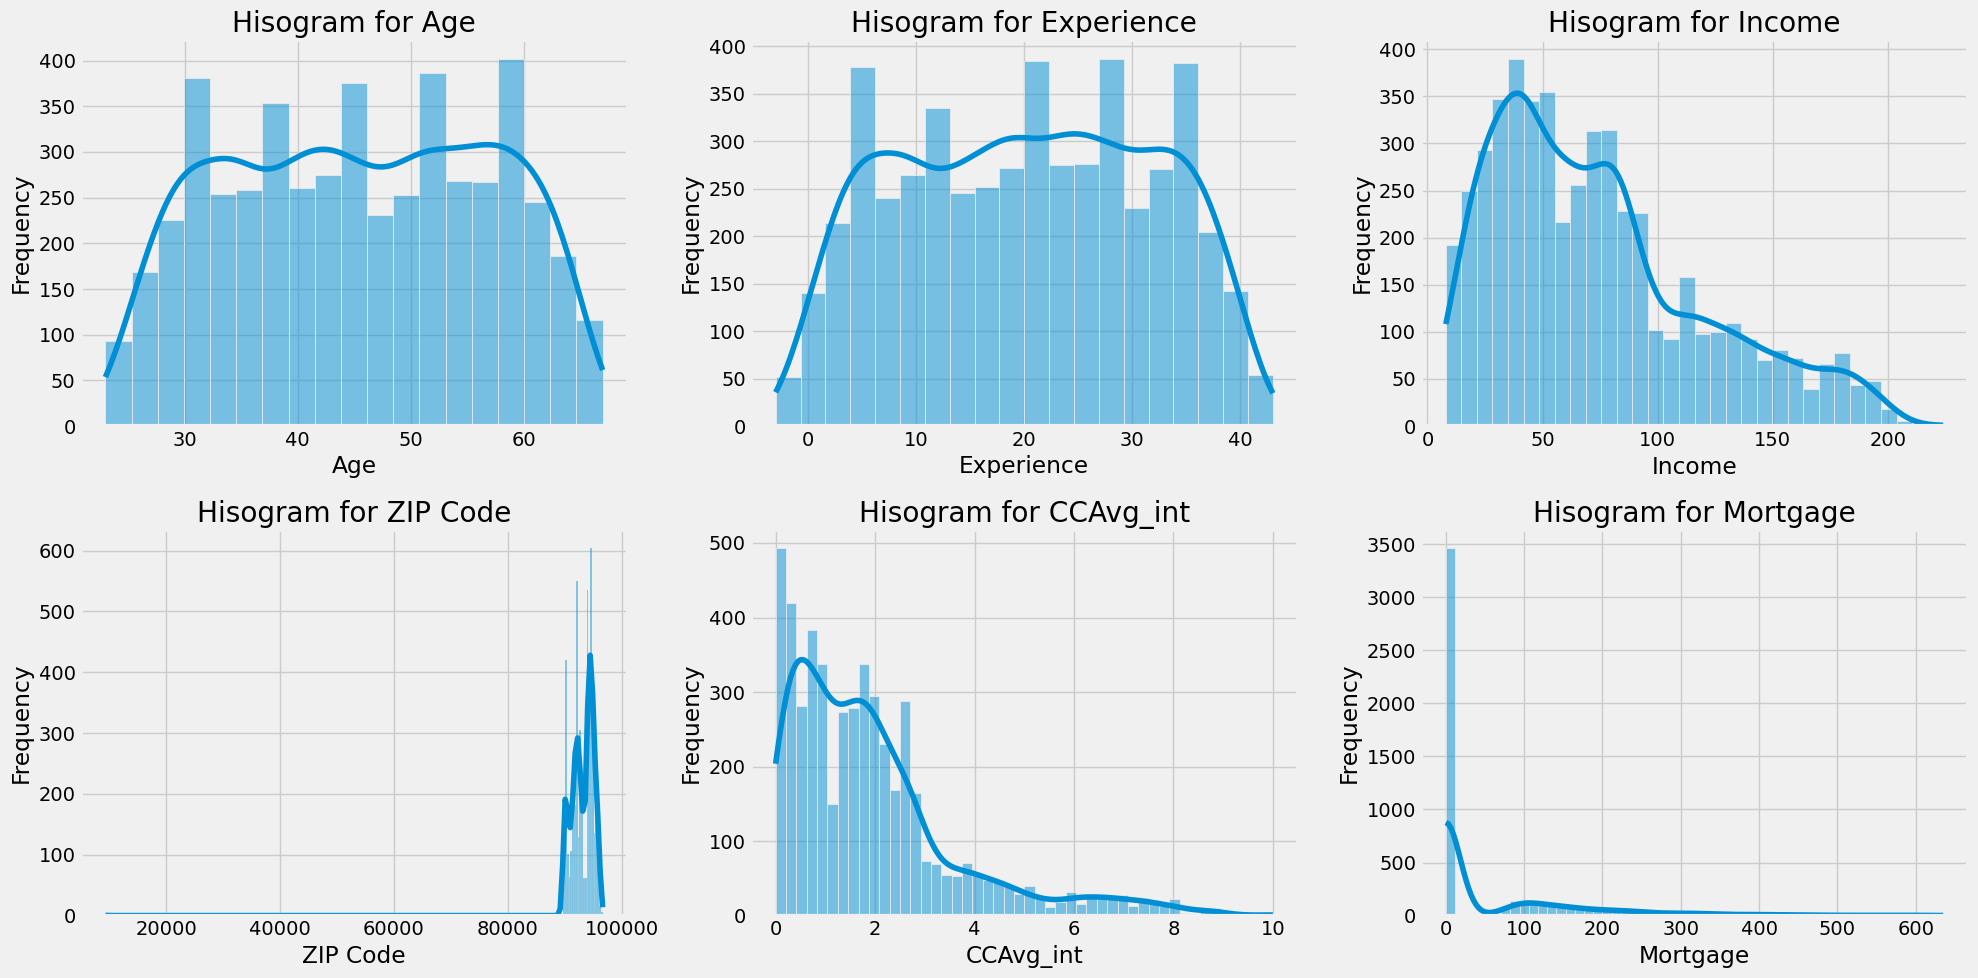

In [11]:
#Histogram
columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg_int',
       'Mortgage']
plt.figure(figsize=(20, 10))

for i, columns in enumerate(columns,1):
    plt.subplot(2,3,i)
    sns.histplot(bank_loan[columns], kde=True)
    plt.title(f'Hisogram for {columns}')
    plt.xlabel(columns)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### <font color=#00FF00>**Insights**</font> **for histogram charts**
- **Age** age of the applicants concentrated between 30 to 60, means the applicats are in the range of young, middle-aged, and senior. Histogram shows normalized age data.
- **Experience** The experience histogram shows the same trend as Age.
- **Income** The income shows right-skewed with a concentration of lower-income individuals, it represents that large proportion of applicants have average to low incomes.
- **Zip Code** The histogram shows certain ZIP codes from specific areas, potentially affecting loan application trends.
- **CCAvg** The histogram shows applicants' average credit card spending. The concentration is in lower spending ranges, with right-skewwness.
- **Mortgage** The distribution of mortgage amounts shows people applying for loans with small to medium mortgages. 

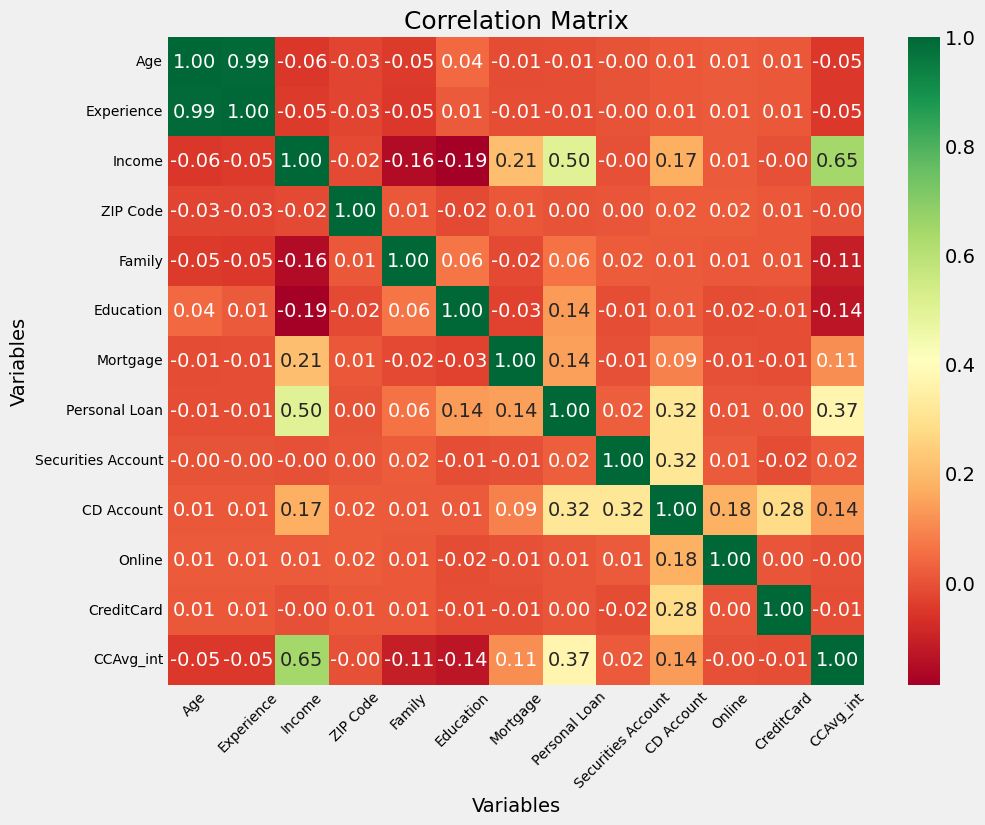

In [12]:
#Corrolation map
plt.figure(figsize=(10,8))
numeric_df = bank_loan.select_dtypes(include=['float', 'int'])
corr= numeric_df.corr()
sns.heatmap(corr, cmap='RdYlGn', annot=True , fmt='.2f')

plt.title('Correlation Matrix', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)

plt.show()

### <font color=#00FF00>**Insights**</font> **for Corrolation chart**
- CCAvg and Income have the highest positive relation with personal loan 0.65 and 0.5 respectively.
- Age and Experience have the highest positive relation.
- Family and Education respectively have the highest negative relation with Income.
- There is no significant releation among features. 

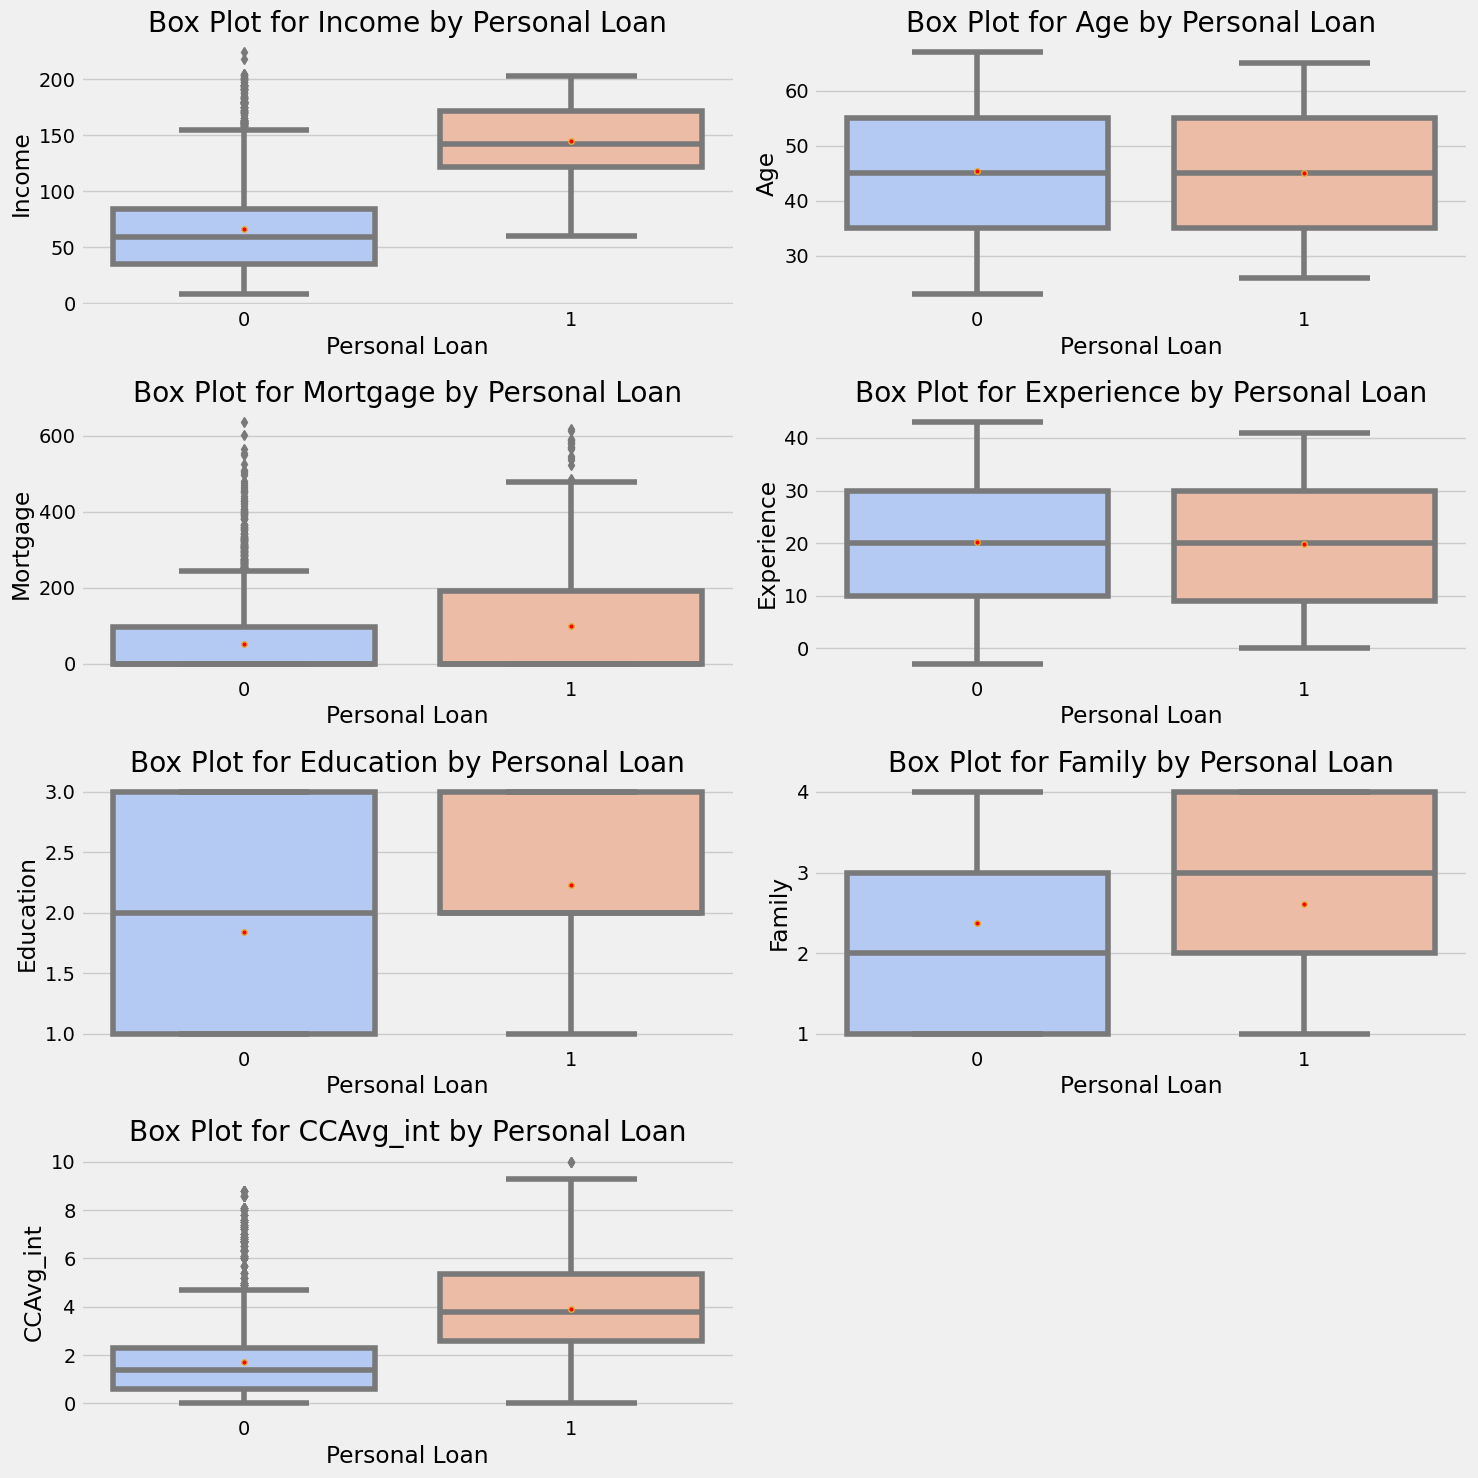

In [13]:
# Boxplot
plt.figure(figsize=(15, 15))
features = ['Income', 'Age',  'Mortgage', 'Experience', 'Education', 'Family', 'CCAvg_int']
# Creating a box plot for each numerical variable with a hue based on sex
for i, variable in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=variable, x='Personal Loan', data=bank_loan, palette="coolwarm", orient='v',
                 showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgewidth":1, "markersize":4})
    plt.title(f'Box Plot for {variable} by Personal Loan')
    plt.ylabel(variable)
    plt.xlabel('Personal Loan')

# Adjusting the layout for better readability
plt.tight_layout()
plt.show()


#### <font color=#00FF00> **Insights**</font> of Box Plot for Personal Loan vs num-variables:
1. **Income**:
- As income increases, so do the chances of getting a loan.
2. **Age,Experience and Mortgage**:
- These features don't show difference in getting a loan or not.
3. **Education**:
- higher education more likely to get personal loan.
4. **Family**
- the smaller the family so do more likely to have personal loan.
5. **CCAvg**
- the rise in CCAvg so do more likely to have personal loan.


In [14]:
pd.crosstab([bank_loan.Family, bank_loan.Education], [bank_loan['Personal Loan']], margins=True).style.background_gradient('summer')

### <font color=#00FF00>**Insights**</font>
- The smaller family size, the higher education level, the higher the chance of recieved personal loan 

In [15]:
pd.crosstab([bank_loan['CD Account'], bank_loan['Online']], [bank_loan['Personal Loan'], bank_loan['Securities Account']], margins=True).style.background_gradient('summer')

### <font color=#00FF00>**Insights**</font>
- For the clients that have CD Account, interact online and also have Securities Account , it isn't significant relation to receive personal loan. 

## <font color='#7FFFD4'>**Standardization and normalization**</font>

In [16]:
bank_loan['norm_Income'] = np.log(bank_loan.Income +1)
bank_loan['norm_CCAvg_int'] = np.log(bank_loan.Income +1)
bank_loan['norm_Mortgage'] = np.log(bank_loan.Income +1)

scaler = StandardScaler()
numerical_features = ['Age', 'Experience', 'norm_Income', 'Education', 'norm_CCAvg_int', 'norm_Mortgage']
bank_loan[numerical_features]= scaler.fit_transform(bank_loan[numerical_features])

# 2. **Feature Engineering**

--------------------------------------------------------------------------------------------------------
#### <font color=#FAEBD7> **Using P-Values for identifying statistically significant relationships between features and the target variable (`Personal Loan`)**</font> for feature selection
- Features with p-values < 0.05 are considered statistically significant.

### <font color=#F0F8FFT> **Test for ZIP Code, Mortgage, Age Variables** </font>
- The t-test compares the means of a numerical feature ZIP Code between receiver_loan and non-receiver_loan.
### <font color=#00FF00>**Insights**</font>
- p > 0.05, the mean ZIP Code doesn't differ significantly between receiver_loan and non-receiver_loan. We can ignor this feature for modeling.
- p value = 5.73 for Age variable, So p > 0.05, the mean Age doesn't differ significantly between receive_loan and non-receive_loan.
- we can Remove ZIP Code from Dataset

In [17]:
from scipy.stats import ttest_ind

# Separate receiver_loan and non-receiver_loan for the ZIP Code feature
received_loan = bank_loan[bank_loan['Personal Loan'] == 1]['ZIP Code']
not_received_loan = bank_loan[bank_loan['Personal Loan'] == 0]['ZIP Code']

# Perform the t-test
t_stat, p_val = ttest_ind(received_loan, not_received_loan)
print(f"T-statistic: {t_stat}, p-value: {p_val}")

T-statistic: 0.0075889651394041606, p-value: 0.9939452428819527


In [18]:
#Drop Zip Code column
bank_loan.drop('ZIP Code', axis=1, inplace=True)

In [20]:
# T-Test to verify significant of 'Age'

# Separate receiver_loan and non-receiver_loan for the Age feature
received_loan = bank_loan[bank_loan['Personal Loan'] == 1]['Age']
not_received_loan = bank_loan[bank_loan['Personal Loan'] == 0]['Age']

# Perform the t-test
t_stat, p_val = ttest_ind(received_loan, not_received_loan)
print(f"T-statistic: {t_stat}, p-value: {p_val}")

T-statistic: -0.5461906615539415, p-value: 0.5849592637053187


### <font color=#F0F8FFT> **Chi-Square Test for validating CCAvg Variable significant** </font>

### <font color=#00FF00>**Insights**</font>
- Feature CCAvg can be validated using p-values to ensure it is statistically significant.
- CCAvg with a high p-value does not contribute significantly to predicting personal loan ownership.

In [21]:
# # Contingency table for 'CCAvg' and receiver_loan and non-receiver_loan 
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(bank_loan['CCAvg'], bank_loan['Personal Loan'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")


Chi-square statistic: 1601.1030734460205, p-value: 1.0338992557344493e-264


# 3. **Model Development**

## <font color=#FFE4C4> **Base Modeling**</font>

In [22]:
# Splitting the dataset into features and target variable
X = bank_loan.drop(['Personal Loan', 'Income', 'CCAvg', 'Mortgage', 'CCAvg_int'], axis=1)
y = bank_loan['Personal Loan']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train.shape, X_test.shape

((3500, 11), (1500, 11))

## <font color=#7FFFD4> **Predictive Modeling**</font>

In [24]:
## Decision Tree
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
prediction1=model_dt.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction1,y_test))

The accuracy of the Decision Tree is 0.9686666666666667


In [25]:
## Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
prediction2=model_lr.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction2,y_test))

The accuracy of the Logistic Regression is 0.952


In [26]:
## K-Nearest Neighbours(KNN)
model_knn=KNeighborsClassifier() 
model_knn.fit(X_train, y_train)
prediction3=model_knn.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the KNN is 0.9693333333333334


In [27]:
## Radial Support Vector Machines(rbf-SVM)
model_svmr=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model_svmr.fit(X_train, y_train)
prediction4=model_svmr.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction4,y_test))

Accuracy for rbf SVM is  0.9786666666666667


In [28]:
## Linear Support Vector Machine(linear-SVM)
model_svml=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model_svml.fit(X_train, y_train)
prediction5=model_svml.predict(X_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction5,y_test))

Accuracy for linear SVM is 0.9526666666666667


In [29]:
## Random Forests
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
prediction6=model_rf.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the Random Forests is 0.98


## <font color=#00FF99> **Cross Validation**</font>

In [30]:
# create dictionary as key=model's name, and value= instanciate model with hyperparameters

classifiers={'Decision Tree':DecisionTreeClassifier(),'Logistic Regression':LogisticRegression(max_iter=2000,random_state=42),'KNN': KNeighborsClassifier(n_neighbors=9),'Radial Svm':svm.SVC(kernel='rbf'),
             'Linear Svm':svm.SVC(kernel='linear'),'Random Forest':RandomForestClassifier(n_estimators=100)}

# List to store results
mEan=[]
accuracy=[]
std=[]

# Loop through classifiers and perform cross-validation
for name, model in classifiers.items():
    cv_cross = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # Cross-validation
    mEan.append(cv_cross.mean())    # Store results as a list
    std.append(cv_cross.std())
    accuracy.append(cv_cross)
    formatted_accuracy = [list(map(lambda x: f"{x:.4f}", acc)) for acc in accuracy]
   # Print results for each model in a seperate line
    print(f'{name} results: ') 
    print(f'CV Scores: {cv_cross}') 
    print(f' Mean CV Score: {cv_cross.mean():.4f}') 
    print(f'Standard Deviation: {cv_cross.std():.4f}')
    print('-' * 40)  # To separate each model's results
   

Decision Tree results: 
CV Scores: [0.97857143 0.97285714 0.97       0.96714286 0.97285714]
 Mean CV Score: 0.9723
Standard Deviation: 0.0038
----------------------------------------
Logistic Regression results: 
CV Scores: [0.95428571 0.96142857 0.94857143 0.95571429 0.96142857]
 Mean CV Score: 0.9563
Standard Deviation: 0.0048
----------------------------------------
KNN results: 
CV Scores: [0.96857143 0.97428571 0.97428571 0.95857143 0.96571429]
 Mean CV Score: 0.9683
Standard Deviation: 0.0059
----------------------------------------
Radial Svm results: 
CV Scores: [0.97857143 0.98285714 0.97428571 0.96857143 0.97428571]
 Mean CV Score: 0.9757
Standard Deviation: 0.0048
----------------------------------------
Linear Svm results: 
CV Scores: [0.95285714 0.96428571 0.95       0.95285714 0.96285714]
 Mean CV Score: 0.9566
Standard Deviation: 0.0058
----------------------------------------
Random Forest results: 
CV Scores: [0.98428571 0.98714286 0.98285714 0.97714286 0.97714286]
 Me

In [31]:
# Create a DataFrame with the results
new_models_dataframe2=pd.DataFrame({'CV Scores': formatted_accuracy,'CV Mean':mEan,'Std':std},index= classifiers.keys())       
new_models_dataframe2 

,CV Scores,CV Mean,Std
Decision Tree,"[0.9786, 0.9729, 0.9700, 0.9671, 0.9729]",0.972286,0.003790
Logistic Regression,"[0.9543, 0.9614, 0.9486, 0.9557, 0.9614]",0.956286,0.004832
KNN,"[0.9686, 0.9743, 0.9743, 0.9586, 0.9657]",0.968286,0.005883
Radial Svm,"[0.9786, 0.9829, 0.9743, 0.9686, 0.9743]",0.975714,0.004781
Linear Svm,"[0.9529, 0.9643, 0.9500, 0.9529, 0.9629]",0.956571,0.005827
Random Forest,"[0.9843, 0.9871, 0.9829, 0.9771, 0.9771]",0.981714,0.003980


# 4. **Models Interpretation and Insights**

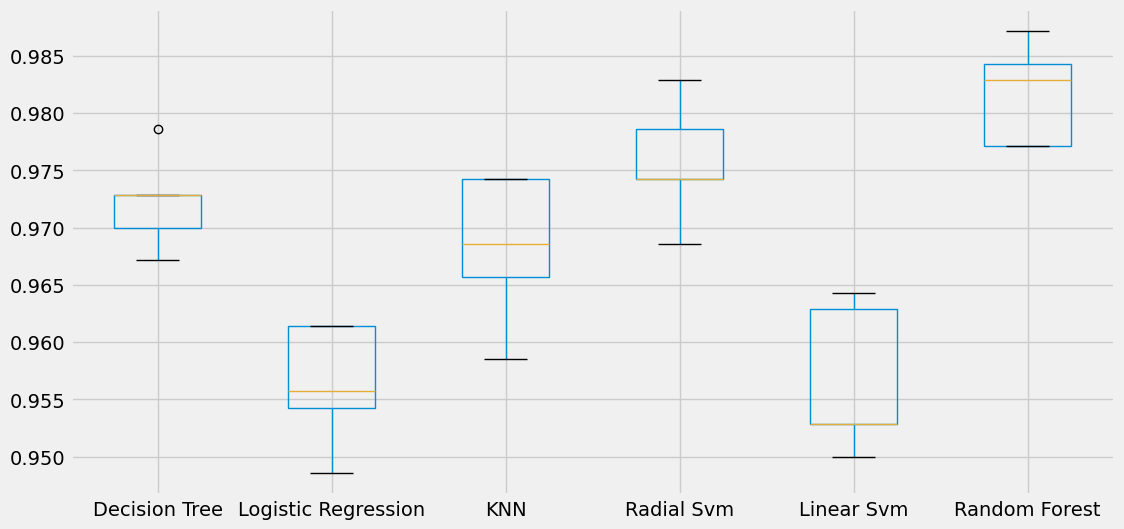

In [32]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=list(classifiers.keys()))
box.T.boxplot()
plt.show()

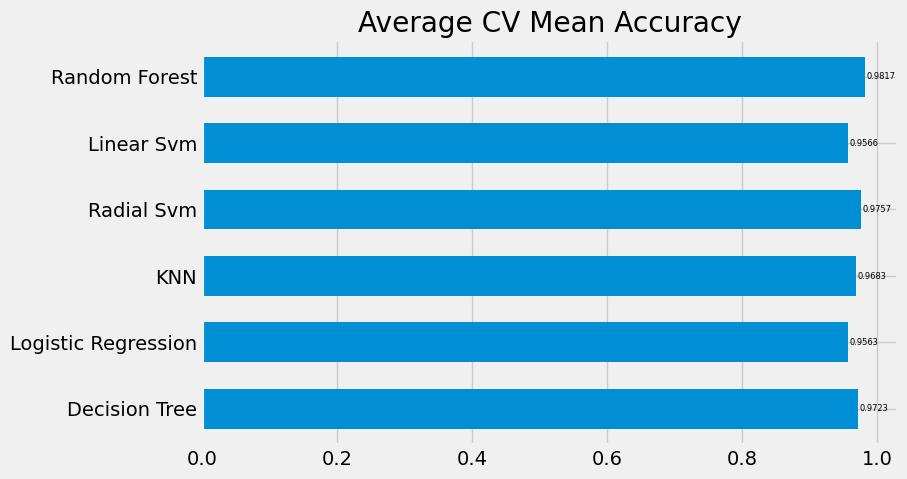

In [33]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.6)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)

for index, value in enumerate(new_models_dataframe2['CV Mean']):
    plt.text(value + 0.002, index, f'{value:.4f}', va='center', fontsize=6)
plt.show()

## <font color=#00FFFF> **Confusion Matrix on train and test dataset**</font>

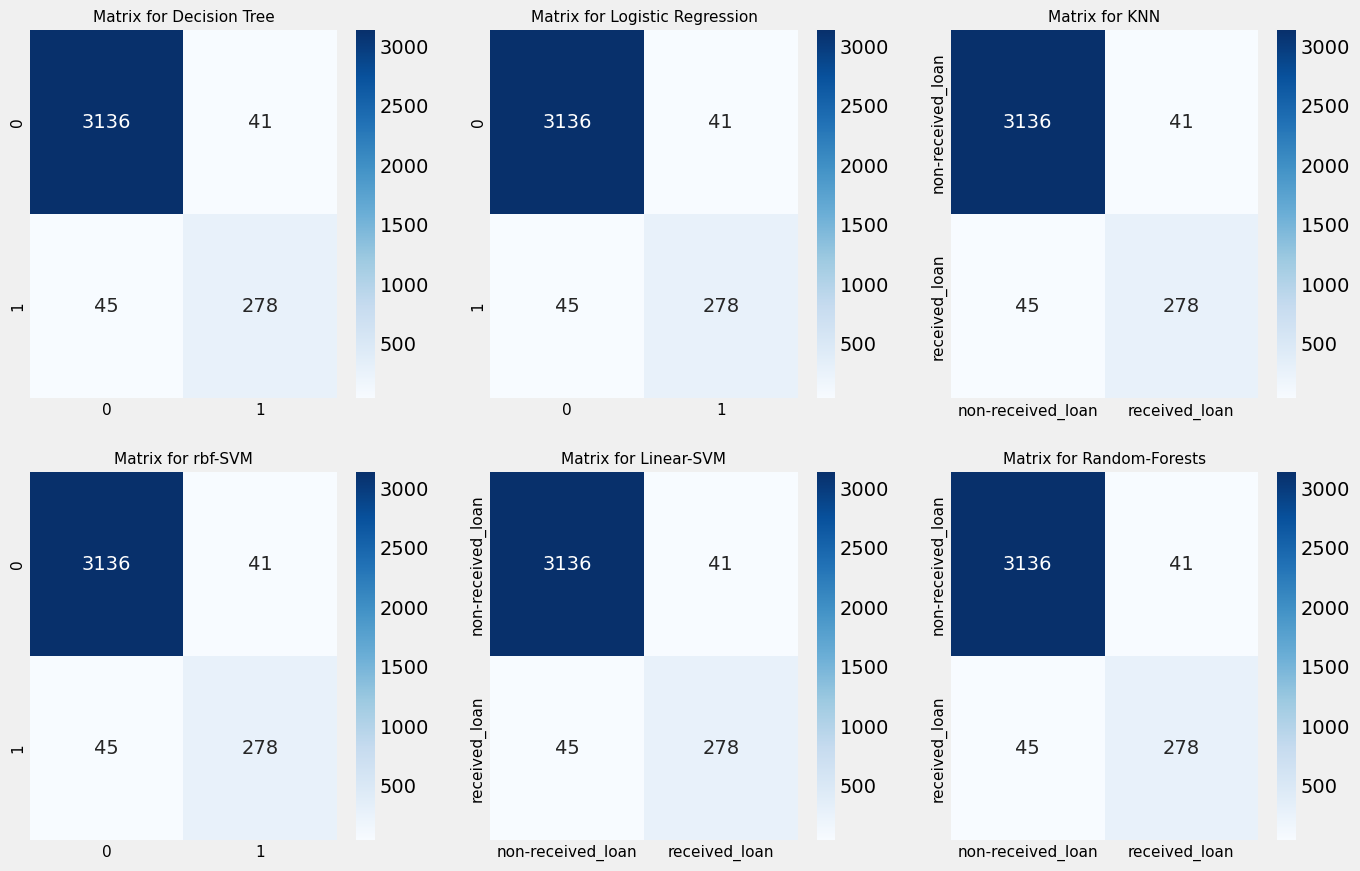

In [34]:
from sklearn.metrics import confusion_matrix
# Create the 2x3 grid of subplots
f, ax = plt.subplots(2, 3, figsize=(15, 10))

# Decision Tree
y_pred_train = cross_val_predict(DecisionTreeClassifier(), X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_train, y_pred_train), ax=ax[1, 2], annot=True, fmt='2.0f', cmap='Blues')
ax[0, 0].set_title('Matrix for Decision Tree', size = 11)
ax[0, 0].xaxis.set_ticklabels(['non-received_loan','received_loan'], size = 11)
ax[0, 0].yaxis.set_ticklabels(['non-received_loan','received_loan'], size = 11)

# Logistic Regression
y_pred = cross_val_predict(LogisticRegression(), X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_train, y_pred_train), ax=ax[1, 1], annot=True, fmt='2.0f', cmap='Blues')
ax[0, 1].set_title('Matrix for Logistic Regression', size = 11)
ax[0, 1].xaxis.set_ticklabels(['non-received_loan','received_loan'], size = 11)
ax[0, 1].yaxis.set_ticklabels(['non-received_loan','received_loan'], size = 11)

# KNN
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_train, y_pred_train), ax=ax[0, 2], annot=True, fmt='2.0f', cmap='Blues')
ax[0, 2].set_title('Matrix for KNN', size = 11)
ax[0, 2].xaxis.set_ticklabels(['non-received_loan','received_loan'], size = 11)
ax[0, 2].yaxis.set_ticklabels(['non-received_loan','received_loan'], size = 11)


# RBF SVM
y_pred = cross_val_predict(SVC(kernel='rbf'), X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_train, y_pred_train), ax=ax[0, 0], annot=True, fmt='2.0f', cmap='Blues')
ax[1, 0].set_title('Matrix for rbf-SVM', size = 11)
ax[1, 0].xaxis.set_ticklabels(['non-received_loan','received_loan'], size = 11)
ax[1, 0].yaxis.set_ticklabels(['non-received_loan','received_loan'], size = 11)

# Linear SVM
y_pred = cross_val_predict(SVC(kernel='linear'), X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_train, y_pred_train), ax=ax[0, 1], annot=True, fmt='2.0f', cmap='Blues')
ax[1, 1].set_title('Matrix for Linear-SVM', size = 11)
ax[1, 1].xaxis.set_ticklabels(['non-received_loan','received_loan'], size = 11)
ax[1, 1].yaxis.set_ticklabels(['non-received_loan','received_loan'], size = 11)


# Random Forest
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_train, y_pred_train), ax=ax[1, 0], annot=True, fmt='2.0f', cmap='Blues')
ax[1, 2].set_title('Matrix for Random-Forests', size = 11)
ax[1, 2].xaxis.set_ticklabels(['non-received_loan','received_loan'], size = 11)
ax[1, 2].yaxis.set_ticklabels(['non-received_loan','received_loan'], size = 11)


# Adjust spacing between plots
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# Display the plot
plt.show()

### <font color=#00FF00>**Insights**</font> Interpreting Confusion Matrix¶
- The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. For instance plot decision tree:

- The no. of correct predictions are 3170(for non-received presonal loan) + 242(for received presonal loan) with the mean CV accuracy being 97.20% which we did get earlier.

- Errors--> Wrongly Classified 81 non-received presonal loan as they recieved and 7 recieved as they are non-received presonal loan. Thus it has made more mistakes by predicting non-received presonal loan as they are receiver.

- By looking at all the matrices, we can say that random forest has a higher chance in correctly predicting non-received personal loan and decision tree and knn have a higher chance in correctly predicting receiver personal loan.

### <font color=#99FF66>**Scors from Confusion matrix**</font> 

In [35]:
# Compare accuracy on test data with different scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


y_pred_test = cross_val_predict(RandomForestClassifier(n_estimators=100), X_test, y_test, cv=10)
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %.3f' % accuracy)


precision = precision_score(y_test, y_pred_test, average='binary')
print('Precision: %.3f' % precision)


recall = recall_score(y_test, y_pred_test, average='binary')
print('Recall: %.3f' % recall)

#f1_score
f1score = f1_score(y_test, y_pred_test, average='binary')
print('F1_Score: %.3f' % f1score)

Accuracy: 0.977
Precision: 0.956
Recall: 0.822
F1_Score: 0.884


In [36]:
# Compare accuracy on train with different scores
accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy: %.3f' % accuracy)


precision = precision_score(y_train, y_pred_train, average='binary')
print('Precision: %.3f' % precision)


recall = recall_score(y_train, y_pred_train, average='binary')
print('Recall: %.3f' % recall)

#f1_score
f1score = f1_score(y_train, y_pred_train, average='binary')
print('F1_Score: %.3f' % f1score)

Accuracy: 0.975
Precision: 0.871
Recall: 0.861
F1_Score: 0.866


## <font color=#CC00CC> **Grid Search CV**</font>

In [37]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [38]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.9568571428571427
Best Parameters: {'C': 11.288378916846883, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [39]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.9711428571428572
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [65]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.9797142857142858
Best Parameters: {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [40]:
dt = DecisionTreeClassifier(random_state=1)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [15, 20, 25],
    'max_features': ['auto', 'sqrt', 10],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3]
}

clf_dt = GridSearchCV(dt, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_dt = clf_dt.fit(X_train, y_train)
clf_performance(best_clf_dt, 'Decision Tree')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Decision Tree
Best Score: 0.9771428571428572
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [41]:
# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV with RandomForestClassifier and the parameter grid
clf_rf_model = GridSearchCV(rf_model, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_rf = clf_rf_model.fit(X_train, y_train)
clf_performance(best_clf_rf, 'Random Farset')



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Random Farset
Best Score: 0.9825714285714285
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## <font color=#FFE4C4> **Feature importance**</font>

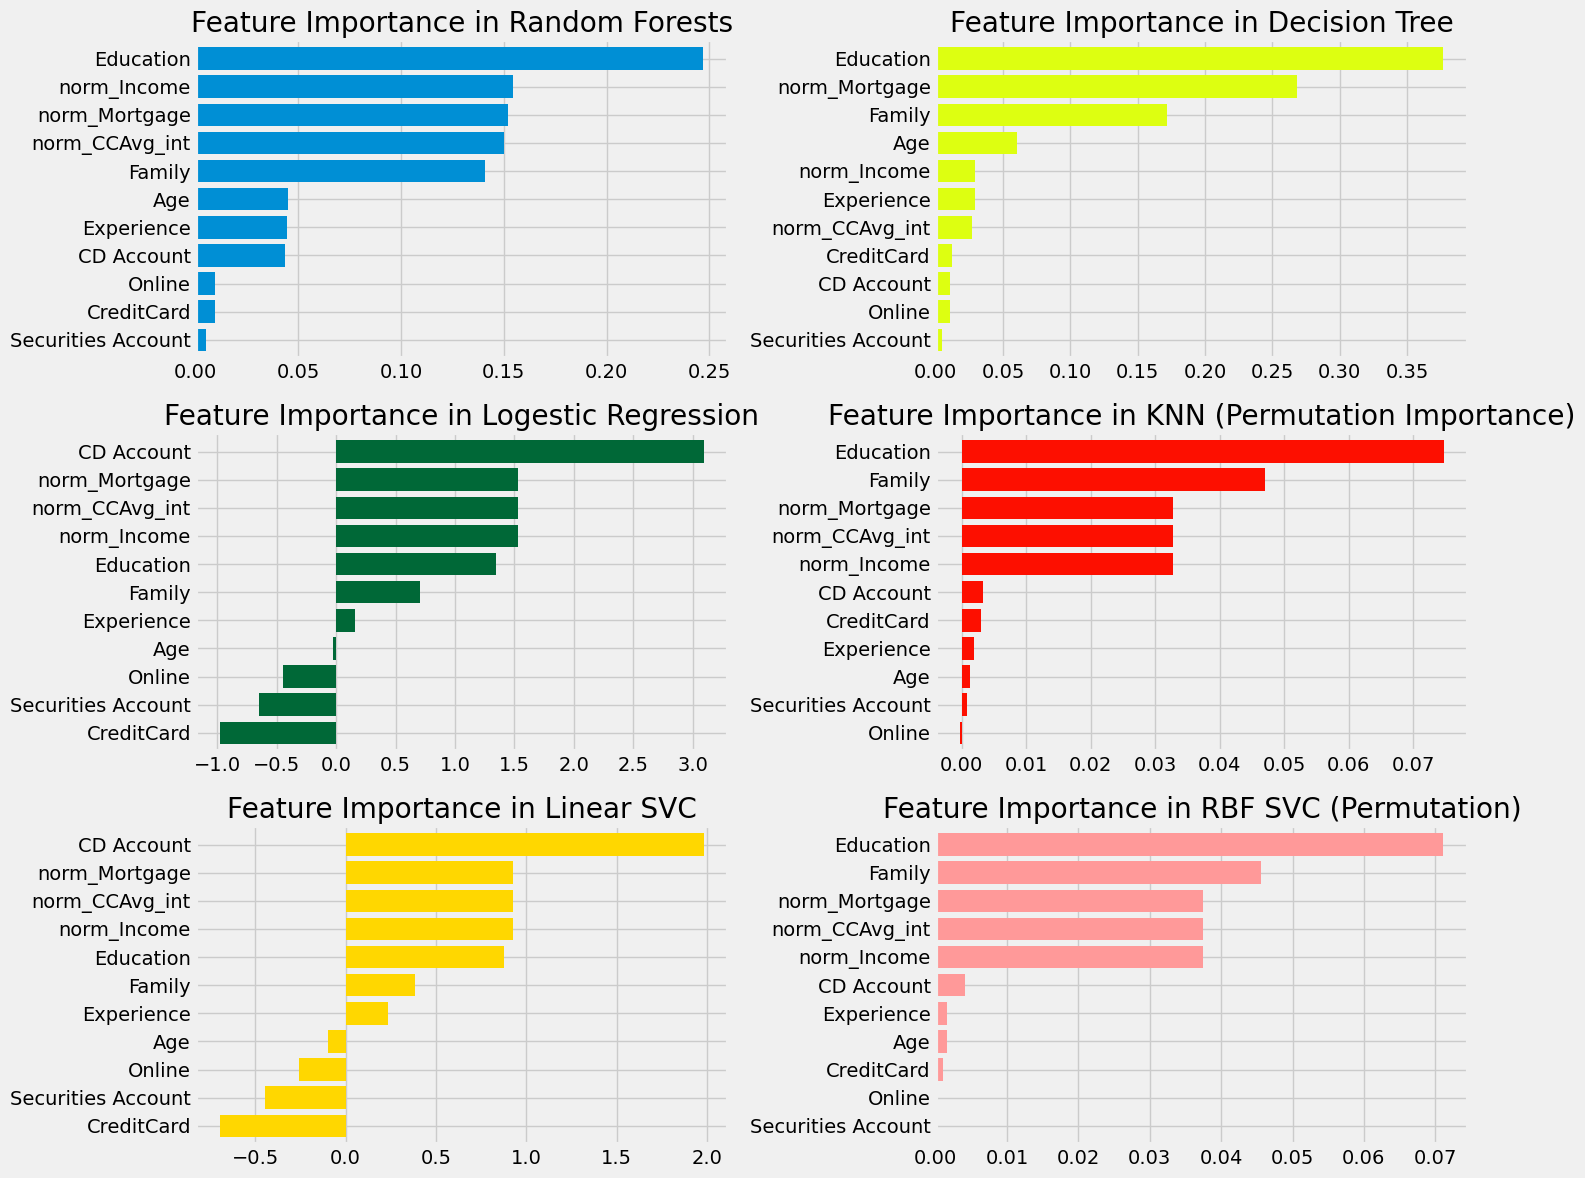

In [68]:
# Visualize the important features for various classifiers 

f,ax=plt.subplots(3,2,figsize=(15,12))

# RandomForest Classifier
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X_train,y_train)
pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

# DecisionTree Classifier
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in Decision Tree')

# Logistic Regression (Using Coefficients)
# We can plot coefficients as feature importance for logistic regression
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
pd.Series(model.coef_[0],X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Logestic Regression')

# K-Nearest Neighbors (Using Permutation Importance)
# Permutation importance is used for models like KNN which do not have feature_importances_
from sklearn.inspection import permutation_importance
model=KNeighborsClassifier()
model.fit(X_train,y_train)
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=0)
pd.Series(result.importances_mean, X_train.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in KNN (Permutation Importance)')

# Support Vector Classifier (Linear) - Using Coefficients for Linear SVC
svc_linear = SVC(kernel='linear', random_state=0)
svc_linear.fit(X_train, y_train)
# Coefficients of the linear SVC can be used for feature importance
pd.Series(svc_linear.coef_[0], X_train.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[2,0], color='#FFD700')
ax[2, 0].set_title('Feature Importance in Linear SVC')

# Support Vector Classifier (Linear) - Using Coefficients for Linear SVC
svc_rbf = SVC(kernel='rbf', random_state=0)
svc_rbf.fit(X_train, y_train)
# Permutation importance for non-linear SVC (RBF kernel)
result = permutation_importance(svc_rbf, X_train, y_train, n_repeats=10, random_state=0)
pd.Series(result.importances_mean, X_train.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[2, 1], color='#FF9999')
ax[2, 1].set_title('Feature Importance in RBF SVC (Permutation)')


plt.tight_layout()
plt.show()

### <font color=#00FF00>**Insights**</font> **Interpreting Feature Importance**
- **1-RandomeFarest** 
  - RandomeFarest shows top most important feature predictor is Education, then Income, Mortgage, and CCAvg are the in next important steps respectively.
  - Family comes after Education, Income, Mortgage, and CCAvg is the fifth most feature importance in RF and almost in all models. 
  - Age, Experience and CD Account have the same importance and after above mentioned features.
  - Online, CrediteCard and Securites Account seem have no influential impact on model prediction.
- **2-Decision Tree** 
  - Decision tree takes these three features (Education, Mortgage,and Family) as the most influential predictors.
  - Age, Income, Experience, and CCAvg have low importance.
  - Online, CrediteCard and Securites Account seem have no influential impact on model prediction.
- **3 & 4-Logestic Regression and Linear SVM** 
  - Thses two linear models take CD Account, Mortgage, CCAvg, Income and Education as the most important features.
  - Age, Online, CrediteCard and Securites Account have no influential impact on model prediction.
- **5 & 6-KNN and RBF SVM** 
  - Thses two models applyies Premutation methode and show the same result for feature importance
  - Education, Family, Mortgage, CCAvg, and Income are important features.
  - CD Account, Experience, Age, Online, CrediteCard and Securites Account have no influential impact on model prediction.

## <font color=#FF9999>**Voting Classifier**</font>
Combining predictions from different applied machine learning models, It gives an average prediction result based on the prediction of all the submodels. 

In [69]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(X_train,y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,y_test))
cross=cross_val_score(ensemble_lin_rbf,X_train,y_train, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.9793333333333333
The cross validated score is 0.9817142857142857


## Model Tuned Performance 
- This table compares the scores obtained from baselines, cross-validation and gridsearchCV and Ensemble methode to refine the models.
- It shows that Random Forest has the best prediction on this project, the chance of receiving the personal loan.


|Model |Baseline|Cross Validation|Tuned Performance(GridSearchCV)|Voting Classifier(Ensemble Methode)|
|-----|--------|-------|--------- |------|
|Decision Tree| 96.73%|97.20% |97.71% ||
|Logistic Regression| 95.2%|95.62% |95.68% ||
|K Nearest Neighbor| 96.93%|96.82%| 97.11%||
|rbf-SVM| 97.86%|97.57% |97.97% ||
|linear-SVM|95.26%| 95.65%  | --||
|Random Forest| 98.20%|98.14%   |98.25% ||
|Ensemble (Voting Classifier) ||98.17%||                                       97.93% |




## <font color =#FF00FF> **Conclusion**</font>
- The Random Forest model identifies Education, Income, Mortgage, CCAvg, and Family as the most influential factors in predicting personal loan applications.
- Understanding the impact of these features helps banks refine the model and gain a deeper understanding of applicants' financial behavior.


## <font color =#00FFFF>**Recommondation**</font>
- The key factors influencing the prediction of personal loan applications are Education, Income, Mortgage, CCAvg, and Family. These features provide valuable insights that help banks make informed decisions about loan approvals and shape their marketing strategies. By considering these factors, banks can better assess applicants' eligibility and target potential customers more effectively. 
